O(1)<O(logn)<O(n)<O(nlogn)<O(n^2)<O(2^n)<O(n!)


In [284]:
import math
 
# Function to check
# Log base 2
def Log2(x):
    return (math.log10(x) /
            math.log10(2));
 
# Function to check
# if x is power of 2
def isPowerOfTwo(n):
    return (math.ceil(Log2(n)) == math.floor(Log2(n)));



### binary search

In [ ]:

def binary_search(arr, low, high, x):
    """
    Keep splitting (low+high)/2 
    and selecting range of inidices that will include x 
    
    T(n)= T(n/2)+O(1) = O(log(n))
    """
    
#     print(arr[low:high])
 
    # Check base case
    if high >= low:
 
        mid = (high + low) // 2
 
        # If element is present at the middle itself
        if arr[mid] == x:
            return mid
 
        # If element is smaller than mid, then it can only
        # be present in left subarray
        elif arr[mid] > x:
            return binary_search(arr, low, mid - 1, x)
 
        # Else the element can only be present in right subarray
        else:
            return binary_search(arr, mid + 1, high, x)
 
    else:
        # Element is not present in the array
        return -1

arr = [ 2, 3, 4, 10, 40 ]
x = 10
 
# Function call
binary_search(arr, 0, len(arr)-1, x)

### Brute SORT

In [ ]:
def brute_sort(x):
    o = [None for _ in range(len(x))]
    for i in range(len(x)):
        for j in range(i+1,len(x)):
            if x[i]<=x[j]:
                o[i]=x[i]
                
                
    return o 

brute_sort([10,2,5,3,7,13,1,6])

### Quick SORT

In [ ]:
import numpy as np 
def partition(arr,low,high):
    n = len(arr)
    
    pivot=  arr[low]
    
    i = low+1
    j = high
    
    while True:
        
        if i>j:
            (arr[low],arr[j])=(arr[j],arr[low])
            break
            
        (arr[i],arr[j])=(arr[j],arr[i])
    
        while i<=j and arr[j]>=pivot:
            j-=1
        while i<=j and arr[i]<=pivot:
            i+=1
    

    return j

x=[10,16,8,12,15,6,3,9,5]
# print(x)
# partition(x,0,len(x)-1)

def quicksort(x,low,high):
    """
    T[n] = T[n]+O(n)
    """
    if low>=high:
        return 
    
    p = partition(x,low,high)
    quicksort(x,low,p-1)
    quicksort(x,p+1,high)
        
        
quicksort(x,0,len(x)-1)
x
            
            
        

### Quickselect (not fast bruh)

In [7]:
def parition(x,p):
    n=len(x )
    lp,ep,gp=[],[],[]
    for i in range(n):
        if x[i]<p:
            lp.append(x[i])
        elif x[i]>p:
            gp.append(x[i])
        else:
            ep.append(x[i])
            
    return lp,ep,gp



def quickselect(arr,k):
    """
    T(n) = T(1) + T(n-1) + O(n) = O(n^2)
    
    return the kth smallest element 
    """

    n = len(arr)
    if n < 10:
        arr.sort()
        return arr[k]

    
    p = arr[0]
    
    lp,ep,gp = parition(arr,p)
    
    if k<=len(lp):
        return quickselect(lp,k)
    elif k>(len(lp)+len(ep)):
        return quickselect(gp,k-len(lp)-len(ep))
    else:
        return p 

    
x=[10,16,8,12,15,6,3,9,5,3]
print(len(x))
print(sorted(x))
quickselect(x,2) 

10
[3, 3, 5, 6, 8, 9, 10, 12, 15, 16]


5

### fast select

In [127]:
def fastselect(arr,k):
    """
    T(n) = T(3/4n) + T(n/5) + O(n) = O(n)
    also known as medians of medians 
    return the kth smallest element 
    """

    n = len(arr)
    g=[]
    for i in range(0,n,5):
        g.append(arr[i:i+5])
        
    s=[]
    for i in range(int(n//5)):
        g[i] = sorted(g[i])
        m_i=g[i][int(len(g[i])//2)]
        s.append(m_i)
        
    if len(s)<=5:
        print(s,len(s)//2)
        p= sorted(s)[int(len(s)//2)]
    else:
        p = fastselect(s,int((len(s)//2)))
    
    lp,ep,gp = parition(arr,p)
    
    if k <= len(lp):
        return fastselect(lp,k)
    elif k > (len(lp)+len(ep)):
        return fastselect(gp,k-len(lp)-len(ep))
    else:
        return p 

    


In [156]:
def select(L, j):
    if len(L) < 10:
        L.sort()
        return L[j]
    S = []
    lIndex = 0
    while lIndex+5 < len(L)-1:
        S.append(L[lIndex:lIndex+5])
        lIndex += 5
    S.append(L[lIndex:])
    Meds = []
    for subList in S:
        Meds.append(select(subList, int((len(subList)-1)/2)))
    med = select(Meds, int((len(Meds))/2))
    L1 = []
    L2 = []
    L3 = []
    for i in L:
        if i < med:
            L1.append(i)
        elif i > med:
            L3.append(i)
        else:
            L2.append(i)
    if j < len(L1):
        return select(L1, j)
    elif j < len(L2) + len(L1):
        return L2[0]
    else:
        return select(L3, j-len(L1)-len(L2))

In [216]:
x=[10,16,8,12,15,6,3,9,5,3]
m = len(x)//2
k = 4

print(sorted(x))
    

res=[]
for i in range(k+1):
    kv=m-k//2+i
    res.append(select( x, kv))
    print(kv,x)
    
res

[3, 3, 5, 6, 8, 9, 10, 12, 15, 16]
3 [10, 16, 8, 12, 15, 6, 3, 9, 5, 3]
4 [10, 16, 8, 12, 15, 6, 3, 9, 5, 3]
5 [10, 16, 8, 12, 15, 6, 3, 9, 5, 3]
6 [10, 16, 8, 12, 15, 6, 3, 9, 5, 3]
7 [10, 16, 8, 12, 15, 6, 3, 9, 5, 3]


[6, 8, 9, 10, 12]

In [223]:
k1=m-k//2+0
k2=m-k//2+k

minv,maxv=select( x,k1),select( x,k2 )

for i in range(len(x)):
    if x[i]>=minv and x[i]<=maxv:
        print(x[i])
    

10
8
12
6
9


In [198]:
# x.index(x[m])
x.index(res[len(res)//2])

7

In [180]:
import numpy as np 
x=np.random.randint(0,100,20).tolist()

k=int(len(x)//2)

print(np.sort(x)[k])

#select_pivot(x,k),x
select(x,k),x

51


(51,
 [26, 71, 70, 81, 86, 51, 47, 56, 43, 3, 99, 95, 62, 78, 2, 29, 2, 34, 8, 42])

In [89]:
print(sorted(x))

        
for k in range(10 
              ):
    x=[10,16,8,12,15,6,3,9,5,3]
    print(sorted(x)[k],fastselect( x,k ))
x

[0, 14, 19, 21, 22, 25, 42, 46, 56, 59, 63, 63, 68, 83, 86, 89, 93, 95, 96, 97]
3 3
3 3
5 5
6 6
8 8
9 9
10 10
12 12
15 15
16 16


[3, 3, 5, 6, 8, 9, 10, 12, 15, 16]

In [130]:

def select_pivot(arr, k):
    """
    Select a pivot corresponding to the kth largest element in the array
    :param arr: Array from which we need to find the median.
    :param k: cardinality that represents the kth larget element in the array
    :return: The value of the pivot
    """
    # Divide array into chunks of 5
    #chunks by taking i from 0 to 4, 5 to 9, 10 to 14, etc
    chunks = [arr[i : i+5] for i in range(0, len(arr), 5)]

    #sort each chunks
    sorted_chunks = [sorted(chunk) for chunk in chunks]


    #take the median of each chunk
    medians = [chunk[len(chunk) // 2] for chunk in sorted_chunks]

    #find the median of medians
    if len(medians) <= 5:
        pivot = sorted(medians)[len(medians) // 2]
    else:
        pivot = select_pivot(len(medians) // 2)



    #partition the array around the pivot
    p = partition(arr, pivot)

    #is the pivot position at the k position?
    if k == p:
        #select that pivot
        return pivot

    if k < p:
        #select a new pivot by looking on the left side of the partioning
        return select_pivot(arr[0:p], k)
    else:
        #select a new pivot by looking on the right side of the partioning
        return select_pivot(arr[p+1:len(arr)], k - p - 1)


def partition(arr, pivot):
    """
    Partition the array around the given pivot
    :param arr: array to be partitioned
    :param pivot: pivot used for the partitioning
    :return: final position of the pivot used as a partioning point
    """
    left = 0
    right = len(arr) - 1
    i = 0

    while i <= right:
        if arr[i] == pivot:
            i += 1

        elif arr[i] < pivot:
            arr[left], arr[i] = arr[i], arr[left]
            left += 1
            i += 1
        else:
            arr[right], arr[i] = arr[i], arr[right]
            right -= 1

    return left


### MergeSORT

In [ ]:
def merge(x,y):
    """
    O(n)
    """
    #print('c',x,y)
    
    k = len(x)
    l = len(y)
    
    if k==0:
        return y
    if l==0:
        return x
    
    if x[0]<=y[0]:
        return x[0:1]+merge(x[1:],y)
    return y[0:1]+merge(x,y[1:])
    
    
    
def mergesort(a):
    """
    T(n)= 2T(n/2)+O(n) = O(nlogn)
    """
    #print('m',a)
    n = len(a)
    if n>1:
        mid= int(n//2)
        return merge(mergesort(a[:mid]),mergesort(a[mid:]))
    return a 
        
        
mergesort([10,2,5,3,7,13,1,6])    

### nbit integer mult

In [287]:
eval(bin(186))

def number_of_bits(n):
    return len('{:b}'.format(n))


def fhalf(n):
    n=bin(n)
    x= len(n)
    return n[:x//2+1]

def shalf(n):
    n=bin(n)
    x= len(n)
    return n[:2]+n[x//2+1:]


def multiply(x,y):
    """
    O(n^(1.5))
    """
    
    
    n=number_of_bits(x)
    
    assert isPowerOfTwo(n),f'{n} is not a power of two'


    x_l =eval(fhalf(x))
    y_l =eval(fhalf(y))
    x_r =eval(shalf(x))
    y_r =eval(shalf(y))
    
    A=x_l*y_l
    B=x_r*y_r
    C=(x_l+x_r)*(y_l+y_r)
    
    return 2**n*A+2**(n/2)*(C-A-B)+B

multiply(182,154)


28028.0

In [304]:
def frombinary(a):
    n= len(a)
    sol = 0
    for i in range(n):
        #print(i,n-i-1)
        v=int(a[i])*2**(n-i-1)
        sol+=v
        
    return sol
        
frombinary(list('1101'))

13

In [ ]:
eval(fhalf(bin(v))),eval(shalf(bin(v)))



### Exponential Search

In [ ]:
s,e=0,1

for _ in range(10):
    s= e
    e= 2*e
    print(s,e)
    
2**10

### Find if a[i]=i in sorted array

In [ ]:
### 
def solve(a,d=0):
    n = len(a)
    
    m = int(n//2)
    print('a=',a,'m=',m,'d=',d,'a[m]-d=',a[m])
    if a[m]==m+d:
        return True
    
    elif len(a)==1:
        return False
    
    elif a[m]<m+d:
        return solve(a[m:],d=m+d)
    
    else:
        print('ok')
        return solve(a[:m],d=d)
    
ass= [[-3,-1,0,3,5,7], #in center
    [-3,-1,0,1,4,7], #at second half 
    [-3, 1,3,4,5,7], #at first half 
    [-3,-2,0,4,5,7]] #not there     
# for a in ass[2:3]:
#     print(solve(a))


### Find index in infinte sorted array

In [ ]:


import numpy as np

a = np.random.randint(0,10000,1000)
a.sort()

x= a[124]

for n in range(1000):
    e= 2**n
    if a[e] >= x:
        break
              
    
binary_search(a, int(e/2),e,x),np.argwhere(a==x)

### convolution 

In [ ]:
import numpy as np
a,b=np.array([1,2,3]),np.array([2,-1,4,])
np.convolve(a,b),(3*b[:3]).sum(),(3*b[3:6]).sum()


a,b=[1,2,3],[0,0,2,-1,4,0,0]


def convolve(a,b):
    c= [0]*len(b)
    L = len(b)
    for k in range(len(c)-len(a)+1):
        for n in range(len(a)):
            c[k] += a[len(a)-n-1]*b[(k+n)%(len(b)-1)]
    return c
convolve(a,b)

In [ ]:
q=5
q-1-np.arange(q),np.arange(q)

### unit circle + nth roots of unity

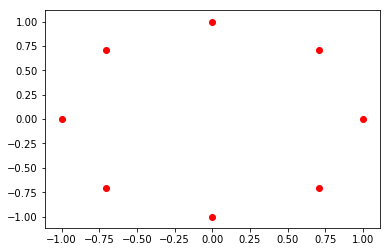

In [312]:

import matplotlib.pyplot as plt 
import numpy as np

def nthroots(n,j=None):
    """
    (w_n)^j = e^{i*2(pi)j} where j=0 -->n-1
    """
    if j is None:
        j= np.arange(n)
    j= np.array(j)
    th= 2*np.pi*j/n
    return np.exp(1j*th)



def nthroots_inv(n,j=None):
    """
    (w_n)^-j = (w_n)^n-j = (1,2(pi)j) where j=0 -->n-1
    """
    if j is None:
        j= (n)-np.arange(n)
    
    else:
        j= np.array(j)
        j = n-j
    
    th= 2*np.pi*j/n
    return np.exp(1j*th)


# i = complex(0,1)


unit = nthroots(8)
plt.scatter(unit.real,unit.imag,color='red')

In [340]:
import math 
import numpy as np 

def FFT(P):
    """
    T(n) = 2T(n/2) + O(n) = O(n log n)
    """
    n = len(P)
    if n==1:
        return P 
    
    w = nthroots(n)
    
    P_e,P_o = P[::2],P[1::2]
    
    y_e,y_o = FFT(P_e),FFT(P_o)
    
    y = [0]*n 
    for j in range(int(n/2)):
        y[j] = y_e[j]+w[j]*y_o[j]
        y[j+int(n/2)] = y_e[j]-w[j]*y_o[j]
    return np.array(y)


def IFFT(P):
    n = len(P)
    if n==1:
        return P 
    
    w = nthroots_inv(n)
    
    P_e,P_o = P[::2],P[1::2]
    
    y_e,y_o = IFFT(P_e),IFFT(P_o)
    
    y = [0]*n 
    for j in range(int(n/2)):
        y[j] = y_e[j]+w[j]*y_o[j]
        y[j+int(n/2)] = y_e[j]-w[j]*y_o[j]
    return np.array(y)

from numpy.fft import rfft, irfft
def fftrealpolymul(arr_a, arr_b):  #fft based real-valued polynomial multiplication
    L = len(arr_a) + len(arr_b)
    print(L)
    a_f = np.fft.fft(arr_a, L)
    b_f = np.fft.fft(arr_b, L)
    
    #return a_f,b_f
    return a_f,b_f,np.fft.ifft(a_f * b_f).real


p1,p2=[1,2,3],[5,3,2,3,1]#[0,0,5,3,2,1,0,0]
L = len(p1)+len(p2)




# FFT(p1+[0]*(L-len(p1))),np.fft.fft(p1+[0]*(L-len(p1)))


a_f,b_f,sol= fftrealpolymul(p1,p2)

prod= FFT(p1+[0]*(L-len(p1)))*FFT(p2+[0]*(L-len(p2)))
np.rint((IFFT(prod)/L).real).astype(int).tolist(),np.rint(sol).astype(int).tolist(),np.convolve(p1,p2).tolist()

8


([5, 13, 23, 16, 13, 11, 3, 0],
 [5, 13, 23, 16, 13, 11, 3, 0],
 [5, 13, 23, 16, 13, 11, 3])

In [360]:
def eval_poly(poly):
    poly= np.array(poly)
    return (poly*([2**i for i in range(len(poly))])).sum()

def poly_coeff(n):
    return [int(i) for i in list(bin(n))[2:]][::-1]

eval_poly(poly_coeff(156))

156

In [350]:
[int(i) for i in list(bin(13))[2:]][::-1]

[1, 0, 1, 1]

In [362]:
p1=poly_coeff(156)
p2=poly_coeff(184)

a_f,b_f,sol= fftrealpolymul(p1,p2)

np.rint(sol.tolist())

16


array([ 0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  2.,  2.,  2.,  2.,  1.,
       -0.,  1.,  0.])

In [364]:
eval_poly(sol),156*184

(28704.0, 28704)

In [338]:
[1]+[2**i for i in range(len(sol)-1)]

[1, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

In [334]:
n=8
2**(n-1)

len(sol)

16

In [ ]:
from cmath import exp, pi
L = len(p1)+len(p2)
def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(int(N//2))]
    return [even[k] + T[k] for k in range(int(N//2))] + \
    [even[k] - T[k] for k in range(int(N//2))]

np.array(fft(p1+[0]*(L-len(p1))))

In [ ]:
len(p1+[0]*(L-len(p1)))


In [ ]:
len(p1)